In [1]:
from keras.models import Model , Sequential
from keras.layers import GlobalAveragePooling2D , Dropout , Dense , Activation
from keras.layers import Conv2D , BatchNormalization , Flatten , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image_dataset_from_directory
from keras.models import load_model
import matplotlib.pyplot as plt

### Compile model

In [2]:
model = Sequential()

model.add(Conv2D(input_shape = (90,120,3), filters = 32, kernel_size = (5,5), strides = (1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (5,5), strides = (1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

adam = Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 86, 116, 32)       2432      
_________________________________________________________________
activation (Activation)      (None, 86, 116, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 43, 58, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 39, 54, 128)       102528    
_________________________________________________________________
activation_1 (Activation)    (None, 39, 54, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 27, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 65664)             0

### Load images

In [3]:
path = "D:/test/dataset/"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.5,
                                   zoom_range=[0.8, 2.0],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

validate_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

In [5]:
train_generator = train_datagen.flow_from_directory(path+'train/',
                                                  batch_size=10,
                                                    target_size=(90,120),
                                                  class_mode='categorical')

validation_generator = validate_datagen.flow_from_directory(path+'val/',
                                                      batch_size=10,
                                                        target_size=(90,120),
                                                      class_mode='categorical')

test_generator = test_datagen.flow_from_directory(path+'test/',
                                                      batch_size=10,
                                                        target_size=(90,120),
                                                      class_mode='categorical')

Found 424 images belonging to 4 classes.
Found 124 images belonging to 4 classes.
Found 64 images belonging to 4 classes.


### Train model

In [6]:
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=train_generator.n//10,
  epochs=50,
  validation_steps=validation_generator.n//10
)

Epoch 1/50
42/42 [==============================] - 17s 380ms/step - loss: 2.6027 - accuracy: 0.3869 - val_loss: 0.7825 - val_accuracy: 0.6667
Epoch 2/50
42/42 [==============================] - 15s 345ms/step - loss: 1.0196 - accuracy: 0.5083 - val_loss: 0.4438 - val_accuracy: 0.8917
Epoch 3/50
42/42 [==============================] - 13s 317ms/step - loss: 0.6545 - accuracy: 0.7810 - val_loss: 0.4630 - val_accuracy: 0.8083
Epoch 4/50
42/42 [==============================] - 13s 315ms/step - loss: 0.5142 - accuracy: 0.7935 - val_loss: 0.4071 - val_accuracy: 0.8833
Epoch 5/50
42/42 [==============================] - 13s 315ms/step - loss: 0.5651 - accuracy: 0.7881 - val_loss: 0.3696 - val_accuracy: 0.9083
Epoch 6/50
42/42 [==============================] - 13s 320ms/step - loss: 0.4305 - accuracy: 0.8582 - val_loss: 0.3138 - val_accuracy: 0.9333
Epoch 7/50
42/42 [==============================] - 13s 316ms/step - loss: 0.4359 - accuracy: 0.8557 - val_loss: 0.3155 - val_accuracy: 0.9250

### Evaluate model & Visualize performance

In [7]:
model.evaluate(test_generator)

7/7 [==============================] - 1s 122ms/step - loss: 0.3874 - accuracy: 0.9062


[0.3873745799064636, 0.90625]

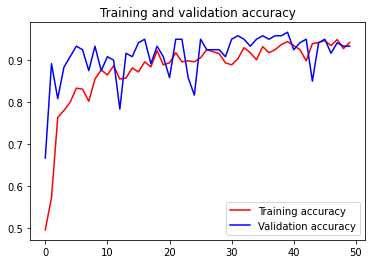

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
fig = plt.gcf()
fig.savefig('from_basic.png',dpi=fig.dpi)
plt.show()



### Save model

In [9]:
model.save('from_basic2.h5')
model.save_weights('from_basic_weights.h5')